KMeans: For clustering data into groups.
pandas: For handling data in a DataFrame format.
MinMaxScaler: For scaling numerical data to a specific range.
pyplot: For plotting data.
files.upload(): To upload files (useful in Colab environment).

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving income.csv to income (1).csv


{'income (1).csv': b'"Name","Age","Income($)"\n"Rob",27,70000\n"Michael",29,90000\n"Mohan",29,61000\n"Ismail",28,60000\n"Kory",42,150000\n"Gautam",39,155000\n"David",41,160000\n"Andrea",38,162000\n"Brad",36,156000\n"Angelina",35,130000\n"Donald",37,137000\n"Tom",26,45000\n"Arnold",27,48000\n"Jared",28,51000\n"Stark",29,49500\n"Ranbir",32,53000\n"Dipika",40,65000\n"Priyanka",41,63000\n"Nick",43,64000\n"Alia",39,80000\n"Sid",41,82000\n"Abdul",39,58000\n"santosh",27,44000\n"pankaj",30,21000\n"prashad",34,33000\n"amit",44,66000\n"ganesh",55,57000\n"sing",49,480000\n"gopal",53,560000\n'}

The dataset (income.csv) is uploaded and read into a Pandas DataFrame (df).
df.head() displays the first few rows to inspect the data.

In [ ]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

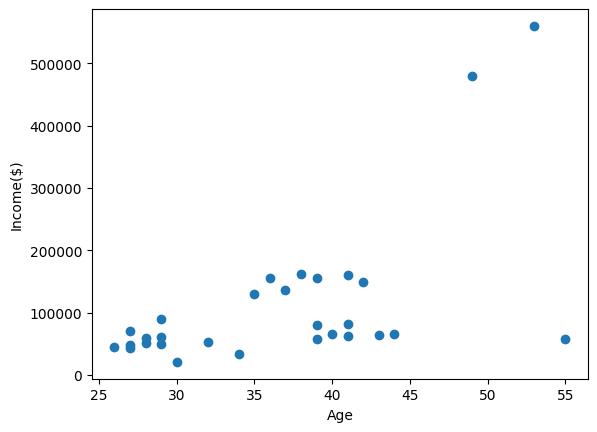

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

A scatter plot is created to visualize the relationship between Age and Income($) in the dataset.
The x-axis represents Age, and the y-axis represents Income.

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1], dtype=int32)

A KMeans clustering model is created with 3 clusters.
fit_predict() performs clustering on Age and Income($) and assigns each data point to a cluster. The resulting cluster labels are stored in y_predicted.

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,2


The predicted cluster labels (y_predicted) are added to the DataFrame as a new column called 'cluster'.
This allows each data point to be associated with its cluster.

In [ ]:
km.cluster_centers_

array([[3.44000000e+01, 5.80250000e+04],
       [5.10000000e+01, 5.20000000e+05],
       [3.82857143e+01, 1.50000000e+05]])

The coordinates of the cluster centroids are retrieved and stored in km.cluster_centers_.

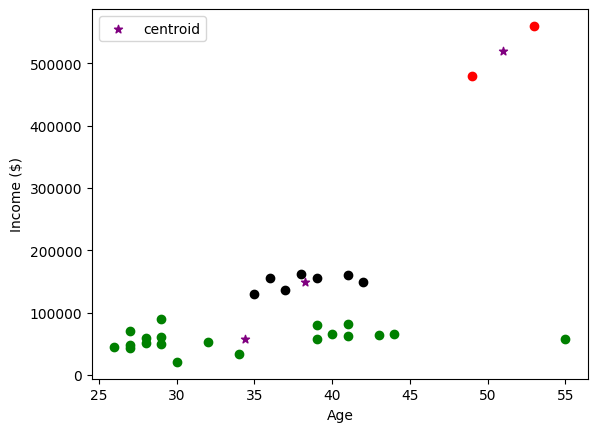

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.034483,0.090909,0
1,Michael,0.103448,0.128015,0
2,Mohan,0.103448,0.074212,0
3,Ismail,0.068966,0.072356,0
4,Kory,0.551724,0.239332,2


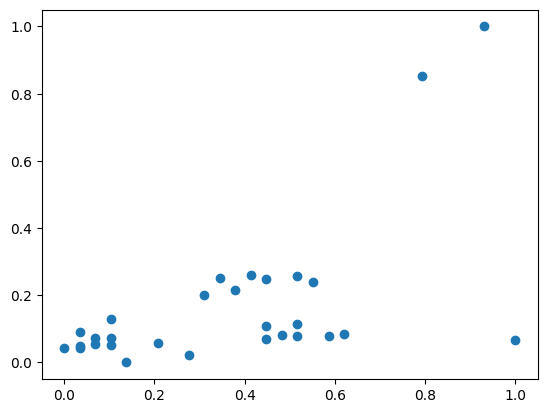

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 2, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.034483,0.090909,0
1,Michael,0.103448,0.128015,0
2,Mohan,0.103448,0.074212,0
3,Ismail,0.068966,0.072356,0
4,Kory,0.551724,0.239332,1


In [ ]:
km.cluster_centers_

array([[0.09770115, 0.05774583],
       [0.50574713, 0.15708101],
       [0.86206897, 0.9257885 ]])

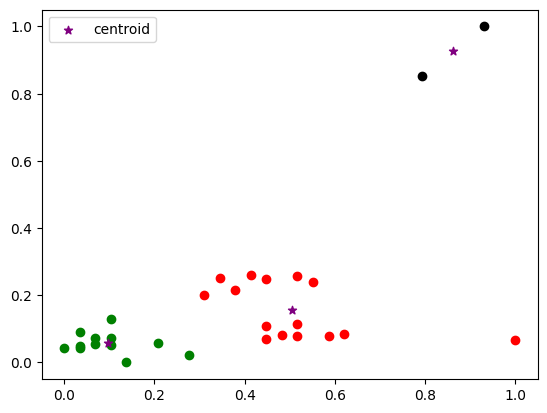

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

The "Elbow Method" is used to find the optimal number of clusters (K).
The sum of squared errors (SSE) for different values of K (from 1 to 9) is calculated.
The SSE is plotted against K to identify the "elbow", which indicates the best number of clusters. The elbow is the point where the SSE starts to level off, suggesting diminishing returns from adding more clusters.

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

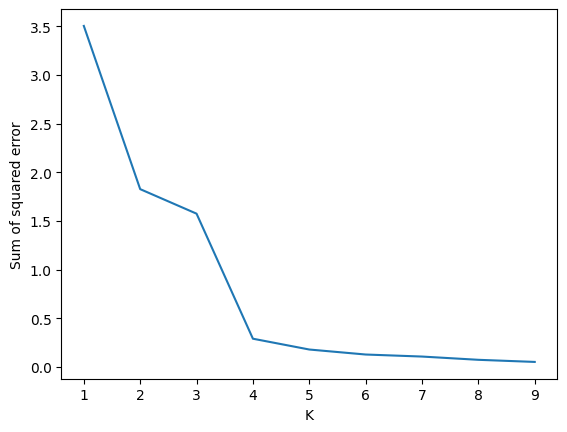

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)